Procesando: sub-101 — Archivos cargados correctamente.


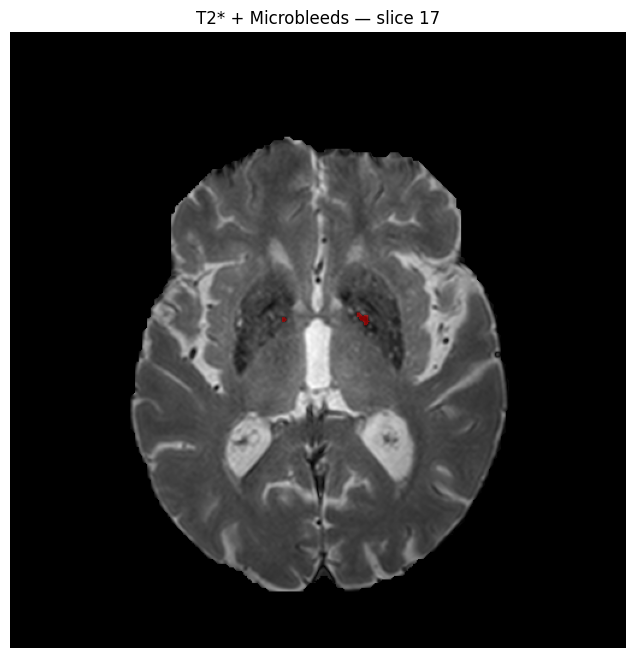

Procesando: sub-102 — Archivos cargados correctamente.


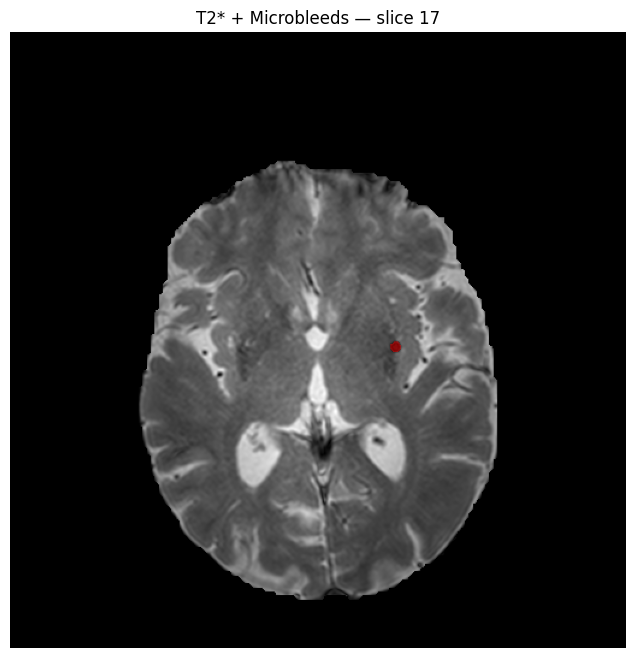

Procesando: sub-103 — Archivos cargados correctamente.


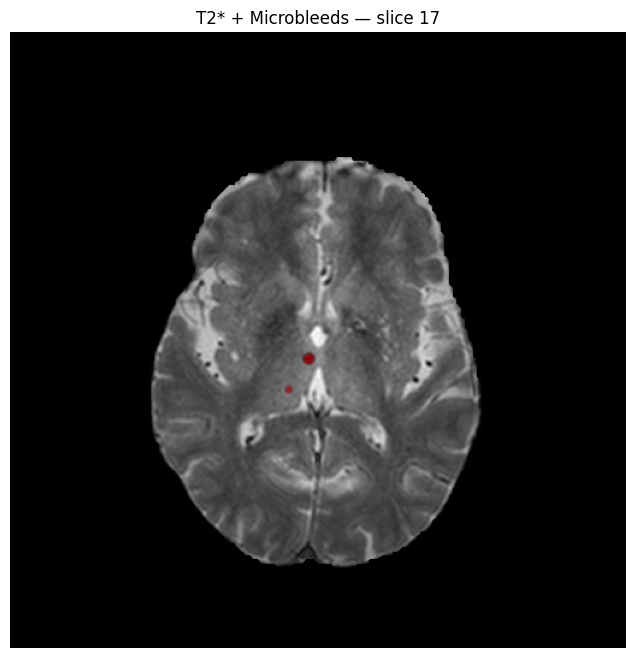

Procesando: sub-104 — Archivos cargados correctamente.


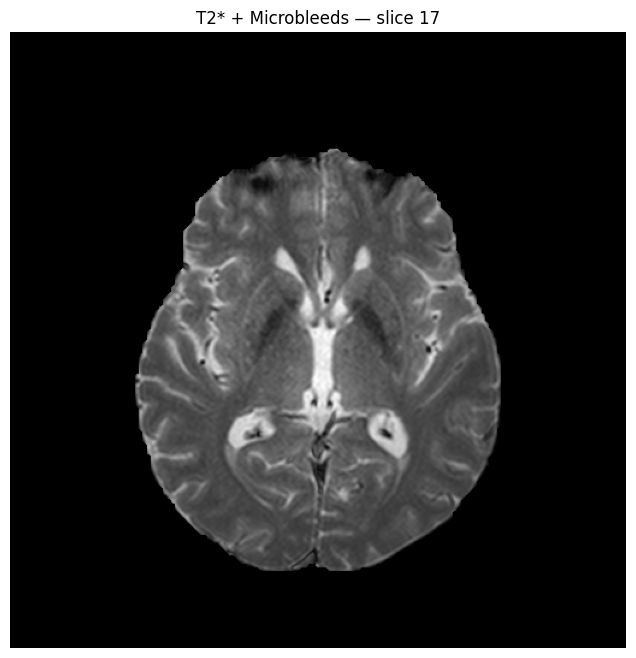

Procesando: sub-105 — Archivos cargados correctamente.


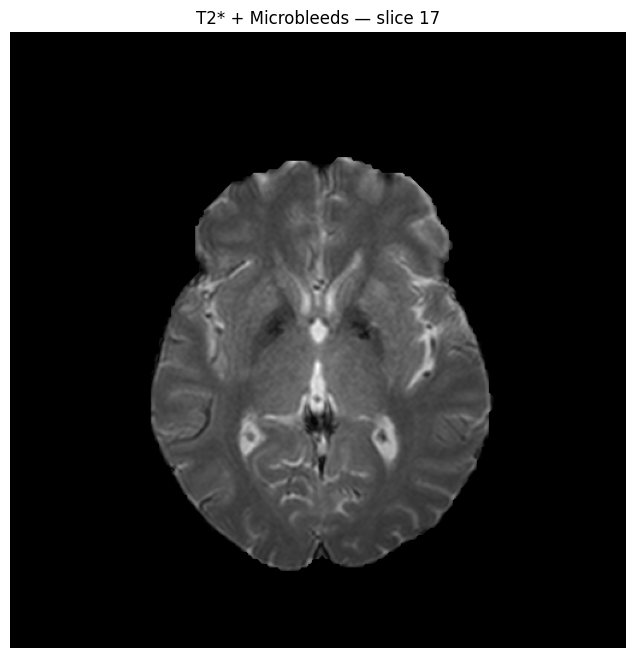

In [1]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Rutas nueva estructura nnU-Net
# -----------------------------
NNUNET_DIR = "/media/guest/PORT-DISK/Practicas/MicroBleeds/nnUNet_raw_data/TaskVALDO"
imagesTr_dir = os.path.join(NNUNET_DIR, "imagesTr")
labelsTr_dir = os.path.join(NNUNET_DIR, "labelsTr")

# -----------------------------
# Función para cargar NIfTI
# -----------------------------
def load_nifti(path):
    nii = nib.load(path)
    data = nii.get_fdata()
    return data, nii.affine

# -----------------------------
# Función para visualizar T2* + máscara CMB
# -----------------------------
def plot_t2s_with_cmb(t2s, cmb, slice_idx=None, alpha=0.5):
    if slice_idx is None:
        slice_idx = t2s.shape[2] // 2
    img = t2s[:, :, slice_idx]
    mask = cmb[:, :, slice_idx]

    plt.figure(figsize=(8, 8))
    plt.imshow(img.T, cmap="gray", origin="lower")
    plt.imshow(np.ma.masked_where(mask == 0, mask).T,
               cmap="autumn", alpha=alpha, origin="lower")
    plt.title(f"T2* + Microbleeds — slice {slice_idx}")
    plt.axis("off")
    plt.show()

# -----------------------------
# Listar sujetos a partir de imagesTr
# -----------------------------
files_t2s = sorted([f for f in os.listdir(imagesTr_dir) if f.endswith("_0000.nii.gz")])
sub_ids = [f.split("_")[0] for f in files_t2s]

# -----------------------------
# Recorrer solo los 5 primeros sujetos
# -----------------------------
for i, sub_id in enumerate(sub_ids):
    if i >= 5:
        break

    # Rutas de imágenes y máscaras en la nueva estructura
    fname_t2s = os.path.join(imagesTr_dir, f"{sub_id}_0000.nii.gz")  # T2*
    fname_cmb = os.path.join(labelsTr_dir, f"{sub_id}.nii.gz")       # máscara

    # Cargar imágenes
    t2s, _ = load_nifti(fname_t2s)
    cmb, _ = load_nifti(fname_cmb)

    print(f"Procesando: {sub_id} — Archivos cargados correctamente.")

    # Visualizar
    plot_t2s_with_cmb(t2s, cmb)
